<a href="https://colab.research.google.com/github/Kaushik2003/Clustering-ML-Model-Project/blob/main/ML_Clustering_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# from collections import Counter
# import warnings
# warnings.filterwarnings('ignore')

# class GamerMusicClusterer:
#     def __init__(self):
#         self.label_encoders = {}
#         self.scaler = StandardScaler()
#         self.kmeans = None
#         self.pca = PCA(n_components=2)

#     def load_data(self, filepath):
#         """Load the CSV data"""
#         df = pd.read_csv(filepath)
#         print(f"Loaded {len(df)} records with shape {df.shape}")
#         return df

#     def preprocess_data(self, df):
#         """Encode categorical variables and scale features"""
#         df_processed = df.copy()

#         # Encode categorical columns
#         categorical_cols = ['game_genre_top_1', 'game_genre_top_2', 'game_genre_top_3',
#                            'music_genre_top_1', 'music_genre_top_2', 'music_genre_top_3']

#         for col in categorical_cols:
#             self.label_encoders[col] = LabelEncoder()
#             df_processed[col] = self.label_encoders[col].fit_transform(df[col])

#         # Scale all features
#         features_scaled = self.scaler.fit_transform(df_processed.values)

#         return features_scaled, df_processed

#     def find_optimal_clusters(self, X, max_k=32):
#         """Find optimal number of clusters using silhouette score"""
#         silhouette_scores = []
#         k_range = range(2, min(max_k + 1, len(X) // 2))

#         for k in k_range:
#             kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#             labels = kmeans.fit_predict(X)
#             score = silhouette_score(X, labels)
#             silhouette_scores.append(score)
#             print(f"k={k}: Silhouette Score={score:.3f}")

#         optimal_k = k_range[np.argmax(silhouette_scores)]
#         print(f"Optimal k: {optimal_k} (Score: {max(silhouette_scores):.3f})")

#         return optimal_k

#     def fit_clustering(self, X, n_clusters):
#         """Fit K-means clustering"""
#         self.kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#         labels = self.kmeans.fit_predict(X)
#         return labels

#     def visualize_clusters(self, X, labels, df_original):
#         """Create cluster visualization"""
#         X_pca = self.pca.fit_transform(X)

#         fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#         # Main cluster plot
#         scatter = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
#         axes[0, 0].set_title('Student Clusters')
#         axes[0, 0].set_xlabel('PC1')
#         axes[0, 0].set_ylabel('PC2')

#         # Plot cluster centers
#         centers_pca = self.pca.transform(self.kmeans.cluster_centers_)
#         axes[0, 0].scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200)
#         plt.colorbar(scatter, ax=axes[0, 0])

#         # Listening hours by cluster
#         df_viz = df_original.copy()
#         df_viz['Cluster'] = labels

#         avg_hours = df_viz.groupby('Cluster')['listening_hours'].mean()
#         axes[0, 1].bar(range(len(avg_hours)), avg_hours.values)
#         axes[0, 1].set_title('Average Listening Hours by Cluster')
#         axes[0, 1].set_xlabel('Cluster')
#         axes[0, 1].set_ylabel('Hours')
#         axes[0, 1].set_xticks(range(len(avg_hours)))
#         axes[0, 1].set_xticklabels([f'C{i}' for i in avg_hours.index])

#         # Cluster sizes
#         cluster_sizes = df_viz['Cluster'].value_counts().sort_index()
#         axes[1, 0].pie(cluster_sizes.values, labels=[f'Cluster {i}' for i in cluster_sizes.index],
#                       autopct='%1.1f%%')
#         axes[1, 0].set_title('Cluster Size Distribution')

#         # Listening hours distribution
#         for cluster in sorted(df_viz['Cluster'].unique()):
#             cluster_data = df_viz[df_viz['Cluster'] == cluster]['listening_hours']
#             axes[1, 1].hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=10)

#         axes[1, 1].set_title('Listening Hours Distribution')
#         axes[1, 1].set_xlabel('Hours per Day')
#         axes[1, 1].legend()

#         plt.tight_layout()
#         plt.show()

#     def analyze_clusters(self, df_original, labels):
#         """Analyze cluster characteristics"""
#         df_analysis = df_original.copy()
#         df_analysis['Cluster'] = labels

#         print("\n" + "="*50)
#         print("CLUSTER ANALYSIS")
#         print("="*50)

#         for cluster in sorted(df_analysis['Cluster'].unique()):
#             cluster_data = df_analysis[df_analysis['Cluster'] == cluster]
#             print(f"\nCluster {cluster} ({len(cluster_data)} students):")

#             # Top gaming preferences
#             all_games = []
#             for col in ['game_genre_1', 'game_genre_2', 'game_genre_3']:
#                 all_games.extend(cluster_data[col].tolist())
#             top_games = Counter(all_games).most_common(3)
#             print(f"  Top Games: {', '.join([f'{game}({count})' for game, count in top_games])}")

#             # Top music preferences
#             all_music = []
#             for col in ['music_genre_1', 'music_genre_2', 'music_genre_3']:
#                 all_music.extend(cluster_data[col].tolist())
#             top_music = Counter(all_music).most_common(3)
#             print(f"  Top Music: {', '.join([f'{music}({count})' for music, count in top_music])}")

#             # Listening habits
#             avg_hours = cluster_data['listening_hours'].mean()
#             print(f"  Avg Listening Hours: {avg_hours:.1f}")

# def main():
#     # Initialize clusterer
#     clusterer = GamerMusicClusterer()

#     # Load and preprocess data
#     df = clusterer.load_data("dataset.csv")
#     X, df_processed = clusterer.preprocess_data(df)

#     # Find optimal clusters and fit
#     optimal_k = clusterer.find_optimal_clusters(X)
#     labels = clusterer.fit_clustering(X, optimal_k)

#     # Analyze and visualize results
#     clusterer.visualize_clusters(X, labels, df)
#     clusterer.analyze_clusters(df, labels)

#     print(f"\nFinal Results: {optimal_k} clusters, {len(df)} students")
#     print(f"Silhouette Score: {silhouette_score(X, labels):.3f}")

# if __name__ == "__main__":
#     main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the user-uploaded dataset
df = pd.read_csv("dataset.csv")

# Print the first 5 rows to see the data's structure
print("First 5 rows of the dataset:")
print(df.head())

# Print a summary to understand the columns, count of records, and data types
print("\nDataset information:")
df.info()

First 5 rows of the dataset:
  game_genre_top_1 game_genre_top_2 game_genre_top_3 music_genre_top_1  \
0              RPG             MOBA              RPG         Bollywood   
1         Strategy           Casual              FPS              Lofi   
2              FPS         Strategy           Puzzle              Lofi   
3         Strategy           Puzzle           Casual         Bollywood   
4              RPG           Sports           Racing         Bollywood   

  music_genre_top_2 music_genre_top_3  listening_hours  
0               Pop             Indie                2  
1               Pop           Hip-Hop                1  
2         Classical         Bollywood                1  
3         Classical               Pop                1  
4               EDM        Devotional                2  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------

In [ ]:
# # --- Step 1: Create separate score tables for games and music ---
# # This makes it easier to manage the points.
# game_genres = df[['game_genre_top_1', 'game_genre_top_2', 'game_genre_top_3']]
# music_genres = df[['music_genre_top_1', 'music_genre_top_2', 'music_genre_top_3']]

In [ ]:
# # Create empty dataframes to hold the new scores
# game_scores = pd.DataFrame()
# music_scores = pd.DataFrame()

In [ ]:
# # --- Step 2: Apply the 3-2-1 weighting system for game genres ---
# # We use pd.get_dummies which is a powerful way to do One-Hot Encoding.
# # It creates a new column for each unique genre.
# for i, col in enumerate(game_genres.columns):
#     weight = 3 - i  # This gives us weights of 3, 2, and 1
#     # We add '_game' to the end of the column name to avoid confusion with music genres
#     weighted_genres = pd.get_dummies(game_genres[col], prefix=f'{col}_is', prefix_sep='_') * weight
#     game_scores = game_scores.add(weighted_genres, fill_value=0)

# # --- Step 3: Apply the 3-2-1 weighting system for music genres ---
# for i, col in enumerate(music_genres.columns):
#     weight = 3 - i  # Weights of 3, 2, 1
#     # We add '_music' to the end of the column name
#     weighted_genres = pd.get_dummies(music_genres[col], prefix=f'{col}_is', prefix_sep='_') * weight
#     music_scores = music_scores.add(weighted_genres, fill_value=0)

# # --- Step 4: Combine everything into a final profile ---
# # We'll join the game scores, music scores, and the original listening hours.
# final_profile = pd.concat([game_scores, music_scores, df['listening_hours']], axis=1)

# # Clean up column names to be more readable
# final_profile.columns = [col.split('_is_')[-1] + ('_game' if 'game' in col else ('_music' if 'music' in col else '')) for col in final_profile.columns]
# # This last part groups scores for the same genre together (e.g. if 'RPG' was #1 and #3, the score becomes 3+1=4)
# final_profile = final_profile.groupby(level=0, axis=1).sum()


# print("--- Final Student Profiles (First 5 Rows) ---")
# # We'll look at a few example columns to see the result
# print(final_profile[['RPG_game', 'MOBA_game', 'Bollywood_music', 'Pop_music', 'listening_hours']].head())


# # --- Step 5: Scale the final data ---
# scaler = StandardScaler()
# scaled_profile = scaler.fit_transform(final_profile)
# df_scaled = pd.DataFrame(scaled_profile, columns=final_profile.columns)

# print("\n--- Scaled Profiles (First 5 Rows) ---")
# print(df_scaled[['RPG_game', 'MOBA_game', 'Bollywood_music', 'Pop_music', 'listening_hours']].head())

--- Final Student Profiles (First 5 Rows) ---
   RPG_game  MOBA_game  Bollywood_music  Pop_music  listening_hours
0       4.0        2.0              3.0        2.0              2.0
1       0.0        0.0              0.0        2.0              1.0
2       0.0        0.0              1.0        0.0              1.0
3       0.0        0.0              3.0        1.0              1.0
4       3.0        0.0              3.0        0.0              2.0

--- Scaled Profiles (First 5 Rows) ---
   RPG_game  MOBA_game  Bollywood_music  Pop_music  listening_hours
0  4.035249   2.167779         0.741887   1.421999        -0.458025
1 -0.410534  -0.419570        -1.545598   1.421999        -0.849108
2 -0.410534  -0.419570        -0.783103  -0.668622        -0.849108
3 -0.410534  -0.419570         0.741887   0.376689        -0.849108
4  2.923803  -0.419570         0.741887  -0.668622        -0.458025


In [ ]:
"""Encode categorical variables and scale features"""
df_processed = df.copy()

# Encode categorical columns
categorical_cols = [
        'game_genre_top_1', 'game_genre_top_2', 'game_genre_top_3',
        'music_genre_top_1', 'music_genre_top_2', 'music_genre_top_3'
    ]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder if needed later

# Scale all features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_processed.values)

Calculating Silhouette & Davies-Bouldin Scores with KMeans...
For k=2, Best Silhouette = 0.1717, DBI = 2.2443 (random_state=5)
For k=3, Best Silhouette = 0.1576, DBI = 2.0536 (random_state=503)
For k=4, Best Silhouette = 0.1592, DBI = 1.8367 (random_state=226)
For k=5, Best Silhouette = 0.1698, DBI = 1.5588 (random_state=102)
For k=6, Best Silhouette = 0.1860, DBI = 1.4939 (random_state=542)
For k=7, Best Silhouette = 0.1933, DBI = 1.4352 (random_state=74)
For k=8, Best Silhouette = 0.1940, DBI = 1.4234 (random_state=155)
For k=9, Best Silhouette = 0.1952, DBI = 1.3770 (random_state=849)
For k=10, Best Silhouette = 0.2002, DBI = 1.3629 (random_state=87)

Optimal clusters: k = 10 | Silhouette = 0.2002 | DBI = 1.3629 | random_state = 87


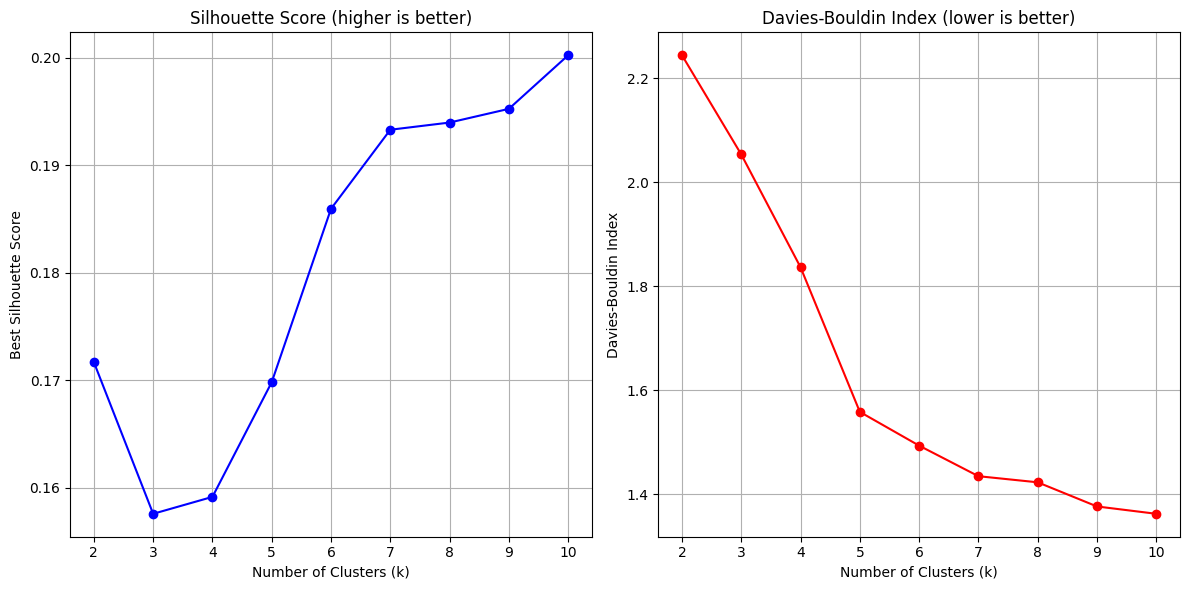

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt



scaled_profile=features_scaled
# --- Find Optimal Number of Clusters with KMeans ---
silhouette_scores = []   # best silhouette per k
dbi_scores = []          # DBI at best silhouette
best_states = {}         # track best random_state per k
k_range = range(2, 11)   # Test for 2 through 10 clusters
n_inits = 1000

print("Calculating Silhouette & Davies-Bouldin Scores with KMeans...")

for k in k_range:
    best_sil_for_k = -1
    best_dbi_for_k = None
    best_state_for_k = None

    for i in range(n_inits):
        kmeans = KMeans(n_clusters=k, random_state=i, n_init=1)
        labels = kmeans.fit_predict(scaled_profile)

        sil = silhouette_score(scaled_profile, labels)
        dbi = davies_bouldin_score(scaled_profile, labels)

        if sil > best_sil_for_k:
            best_sil_for_k = sil
            best_dbi_for_k = dbi
            best_state_for_k = i

    silhouette_scores.append(best_sil_for_k)
    dbi_scores.append(best_dbi_for_k)
    best_states[k] = best_state_for_k
    print(f"For k={k}, Best Silhouette = {best_sil_for_k:.4f}, DBI = {best_dbi_for_k:.4f} (random_state={best_state_for_k})")

# Find the overall best k (by silhouette)
optimal_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
best_dbi = dbi_scores[np.argmax(silhouette_scores)]
best_state = best_states[optimal_k]

print(f"\nOptimal clusters: k = {optimal_k} | Silhouette = {best_score:.4f} | DBI = {best_dbi:.4f} | random_state = {best_state}")

# --- Plot Silhouette and DBI ---
plt.figure(figsize=(12, 6))

# Silhouette
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Best Silhouette Score')
plt.title('Silhouette Score (higher is better)')
plt.xticks(k_range)
plt.grid(True)

# DBI
plt.subplot(1, 2, 2)
plt.plot(k_range, dbi_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (lower is better)')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()


Calculating Silhouette & Davies-Bouldin Scores with GaussianMixture...
For k=2, Best Silhouette = 0.1387, DBI = 2.4558 (random_state=9)
For k=3, Best Silhouette = 0.1419, DBI = 2.0634 (random_state=7)
For k=4, Best Silhouette = 0.1307, DBI = 2.0306 (random_state=3)
For k=5, Best Silhouette = 0.1538, DBI = 1.6568 (random_state=8)
For k=6, Best Silhouette = 0.1568, DBI = 1.6327 (random_state=3)
For k=7, Best Silhouette = 0.1702, DBI = 1.5096 (random_state=2)
For k=8, Best Silhouette = 0.1825, DBI = 1.5189 (random_state=2)
For k=9, Best Silhouette = 0.1876, DBI = 1.4557 (random_state=2)
For k=10, Best Silhouette = 0.1774, DBI = 1.4455 (random_state=2)

Optimal clusters: k = 9 | Silhouette = 0.1876 | DBI = 1.4557 | random_state = 2


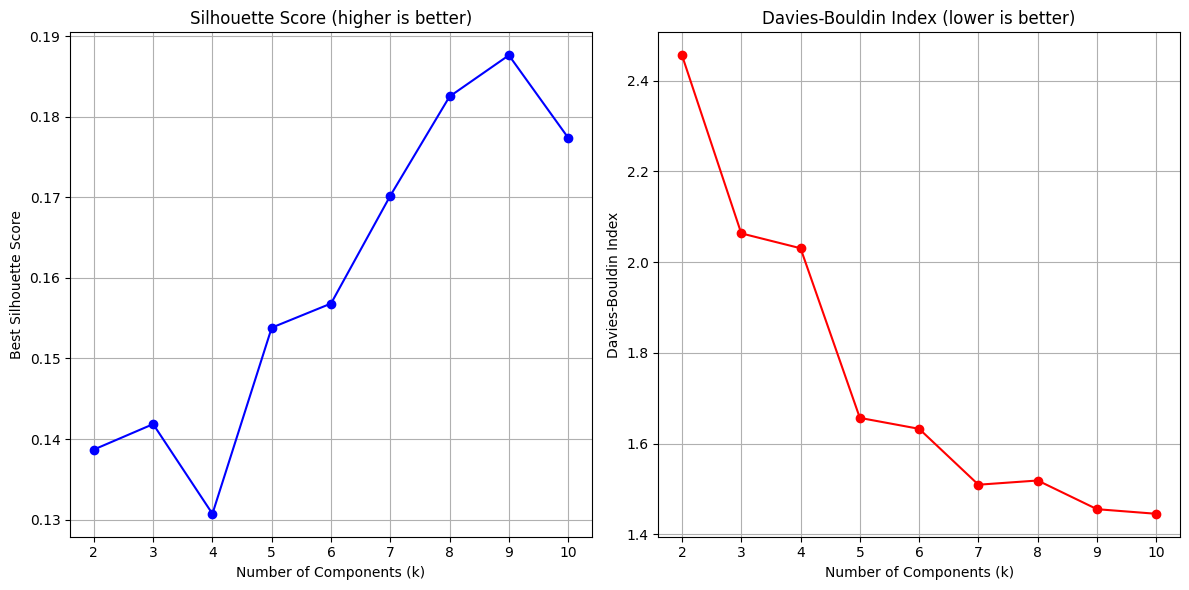

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt


scaled_profile=features_scaled
# --- Find Optimal Number of Clusters with GMM ---
silhouette_scores = []   # best silhouette per k
dbi_scores = []          # DBI at best silhouette
best_states = {}         # track best random_state per k
k_range = range(2, 11)   # Test for 2 through 10 clusters
n_inits = 10

print("Calculating Silhouette & Davies-Bouldin Scores with GaussianMixture...")

for k in k_range:
    best_sil_for_k = -1
    best_dbi_for_k = None
    best_state_for_k = None

    for i in range(n_inits):
        gmm = GaussianMixture(n_components=k, random_state=i, n_init=1)
        labels = gmm.fit_predict(scaled_profile)

        sil = silhouette_score(scaled_profile, labels)
        dbi = davies_bouldin_score(scaled_profile, labels)

        if sil > best_sil_for_k:
            best_sil_for_k = sil
            best_dbi_for_k = dbi
            best_state_for_k = i

    silhouette_scores.append(best_sil_for_k)
    dbi_scores.append(best_dbi_for_k)
    best_states[k] = best_state_for_k
    print(f"For k={k}, Best Silhouette = {best_sil_for_k:.4f}, DBI = {best_dbi_for_k:.4f} (random_state={best_state_for_k})")

# Find the overall best k (by silhouette)
optimal_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
best_dbi = dbi_scores[np.argmax(silhouette_scores)]
best_state = best_states[optimal_k]

print(f"\nOptimal clusters: k = {optimal_k} | Silhouette = {best_score:.4f} | DBI = {best_dbi:.4f} | random_state = {best_state}")

# --- Plot Silhouette and DBI ---
plt.figure(figsize=(12, 6))

# Silhouette
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Components (k)')
plt.ylabel('Best Silhouette Score')
plt.title('Silhouette Score (higher is better)')
plt.xticks(k_range)
plt.grid(True)

# DBI
plt.subplot(1, 2, 2)
plt.plot(k_range, dbi_scores, 'ro-')
plt.xlabel('Number of Components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (lower is better)')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-fuzzy > /dev/null 2>&1

Calculating Silhouette & Davies-Bouldin Scores with Fuzzy C-Means...
For k=2, Best Silhouette = 0.1344, DBI = 2.4880 (random_state=13)
For k=3, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=1)
For k=4, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=5, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=6, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=7, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=8, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=9, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)
For k=10, Best Silhouette = 0.1331, DBI = 2.4914 (random_state=0)

Optimal clusters: k = 2 | Silhouette = 0.1344 | DBI = 2.4880 | random_state = 13


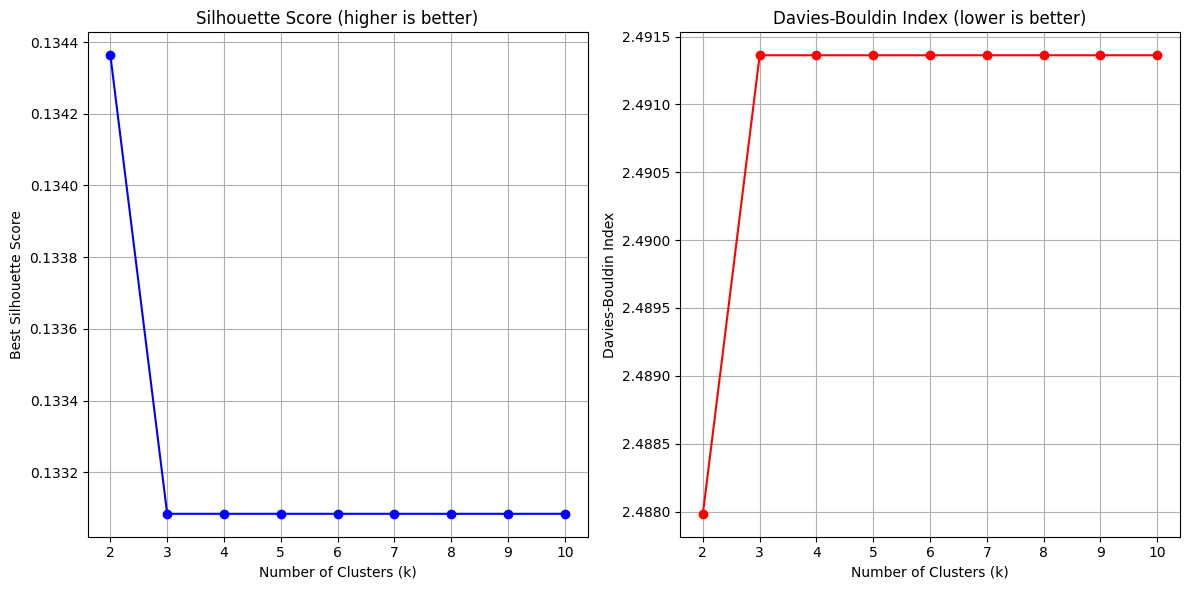

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score, davies_bouldin_score


scaled_profile=features_scaled
# --- Find Optimal Number of Clusters with Fuzzy C-Means ---
silhouette_scores = []   # best silhouette per k
dbi_scores = []          # DBI at best silhouette
best_states = {}         # track best random_state per k
k_range = range(2, 11)   # Test for 2 through 10 clusters
n_inits = 50             # number of random restarts

print("Calculating Silhouette & Davies-Bouldin Scores with Fuzzy C-Means...")

# scikit-fuzzy expects data as shape (features, samples)
X = scaled_profile.T

for k in k_range:
    best_sil_for_k = -1
    best_dbi_for_k = None
    best_state_for_k = None

    for i in range(n_inits):
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
            X, c=k, m=2.0, error=1e-6, maxiter=1000, init=None, seed=i
        )

        # Convert soft membership to hard labels
        labels = np.argmax(u, axis=0)

        sil = silhouette_score(scaled_profile, labels)
        dbi = davies_bouldin_score(scaled_profile, labels)

        if sil > best_sil_for_k:
            best_sil_for_k = sil
            best_dbi_for_k = dbi
            best_state_for_k = i

    silhouette_scores.append(best_sil_for_k)
    dbi_scores.append(best_dbi_for_k)
    best_states[k] = best_state_for_k
    print(f"For k={k}, Best Silhouette = {best_sil_for_k:.4f}, DBI = {best_dbi_for_k:.4f} (random_state={best_state_for_k})")

# Find the overall best k (by silhouette)
optimal_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
best_dbi = dbi_scores[np.argmax(silhouette_scores)]
best_state = best_states[optimal_k]

print(f"\nOptimal clusters: k = {optimal_k} | Silhouette = {best_score:.4f} | DBI = {best_dbi:.4f} | random_state = {best_state}")

# --- Plot Silhouette and DBI ---
plt.figure(figsize=(12, 6))

# Silhouette
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Best Silhouette Score')
plt.title('Silhouette Score (higher is better)')
plt.xticks(k_range)
plt.grid(True)

# DBI
plt.subplot(1, 2, 2)
plt.plot(k_range, dbi_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (lower is better)')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()
